In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from google.colab import drive
drive.mount('/content/drive')


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Training.csv')
test_data =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/Testing.csv')

In [42]:
x = train_data.iloc[:,:-2]
y = train_data.loc[:,'prognosis']

enc = LabelEncoder(); enc.fit(y)
train_data['categorical_label'] = enc.transform(y)
y = train_data['categorical_label']

# Exploratory Data Analysis

In [43]:
train_data.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133,categorical_label
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,NaN,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,NaN,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,NaN,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,NaN,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,NaN,15


In [44]:
del train_data["Unnamed: 133"]

In [45]:
train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,categorical_label
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,20.000000
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,11.833362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000


In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to categorical_label
dtypes: int64(133), object(1)
memory usage: 5.0+ MB


In [47]:
train_data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
categorical_label       0
Length: 134, dtype: int64

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


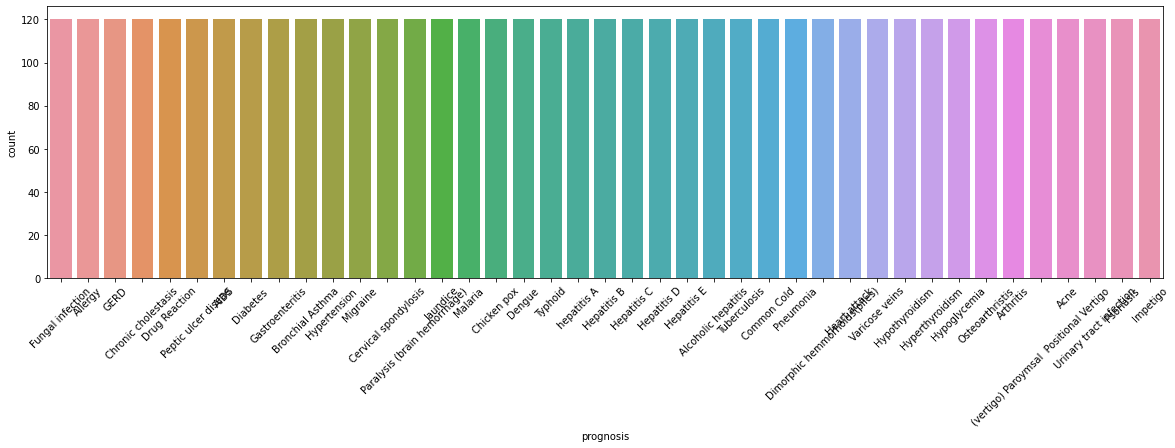

In [48]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.countplot(train_data["prognosis"])
print(train_data.prognosis.value_counts())

In [49]:
for i in x.columns:
    if x[i].sum() == 0:
        x.drop(i,axis=1)

In [50]:
x.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


In [51]:
def correlated(df):
    correl = set()
    c = df.corr()
    for i in range(len(c.columns)):
        for j in range(i):
            if c.iloc[i,j]>0.8:
                correl.add(c.columns[i])
    return correl
corr_col = correlated(x)
len(corr_col)

51

In [52]:
x = x.drop(corr_col,axis=1)

In [53]:
x.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
       'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'indigestion', 'headache',
       'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite',
       'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain',
       'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'chest_pain', 'weakness_in_limbs',
       'fast_heart_rate', 'pain_during_bowel_movements', 'neck_pain',


## Analysing diseases which have common symptoms

                     itching    Percent
prognosis                              
Chicken pox              114  16.814159
Chronic cholestasis      114  16.814159
Drug Reaction            114  16.814159
Fungal infection         108  15.929204
Hepatitis B              114  16.814159
Jaundice                 114  16.814159


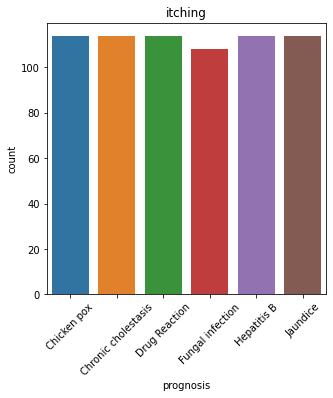

                  skin_rash    Percent
prognosis                             
Acne                    114  14.503817
Chicken pox             114  14.503817
Dengue                  114  14.503817
Drug Reaction           108  13.740458
Fungal infection        108  13.740458
Impetigo                114  14.503817
Psoriasis               114  14.503817


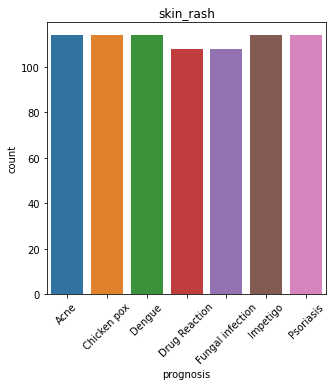

                  nodal_skin_eruptions  Percent
prognosis                                      
Fungal infection                   108    100.0


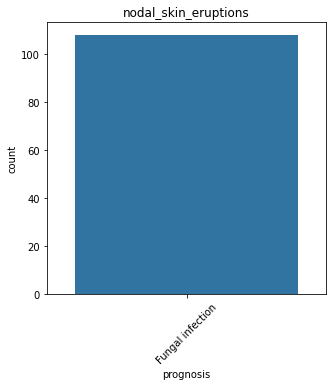

             continuous_sneezing    Percent
prognosis                                  
Allergy                      108  48.648649
Common Cold                  114  51.351351


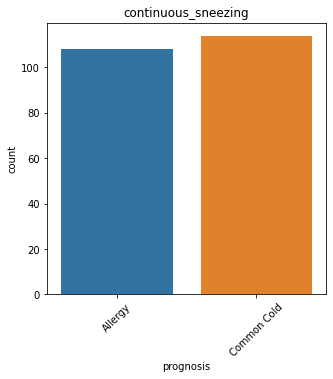

           shivering  Percent
prognosis                    
Allergy          108    100.0


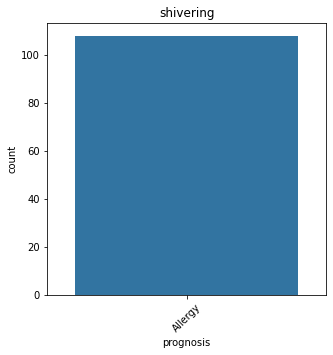

              chills    Percent
prognosis                      
Allergy          108  13.533835
Common Cold      114  14.285714
Dengue           114  14.285714
Malaria          114  14.285714
Pneumonia        114  14.285714
Tuberculosis     114  14.285714
Typhoid          120  15.037594


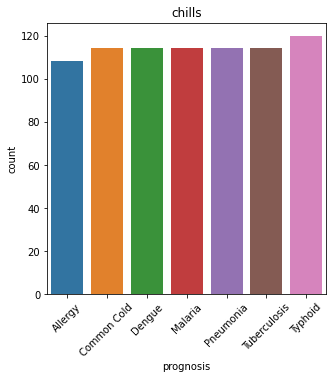

                 joint_pain    Percent
prognosis                             
Dengue                  114  16.666667
Hepatitis D             114  16.666667
Hepatitis E             114  16.666667
Osteoarthristis         114  16.666667
Psoriasis               114  16.666667
hepatitis A             114  16.666667


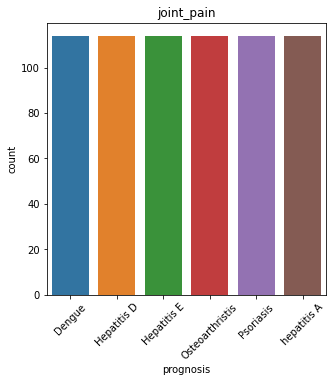

               stomach_pain    Percent
prognosis                             
Drug Reaction           108  48.648649
GERD                    114  51.351351


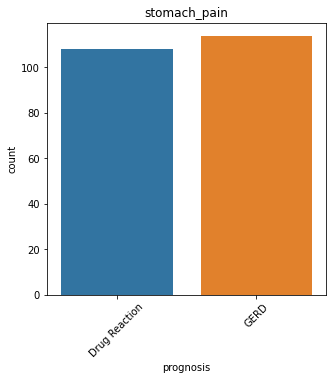

           acidity    Percent
prognosis                    
GERD           108  48.648649
Migraine       114  51.351351


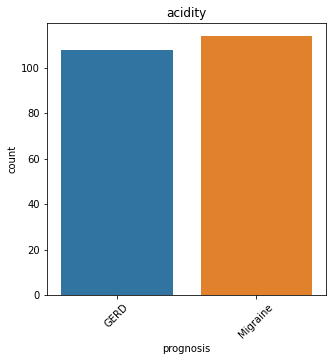

           ulcers_on_tongue  Percent
prognosis                           
GERD                    108    100.0


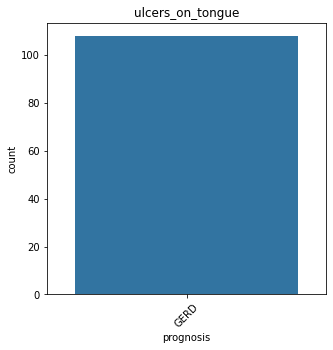

           muscle_wasting  Percent
prognosis                         
AIDS                  108    100.0


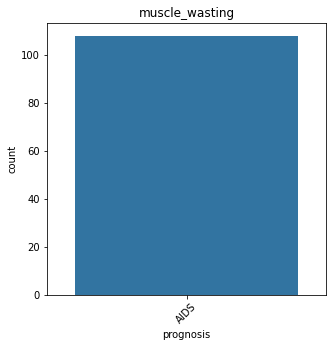

                                         vomiting   Percent
prognosis                                                  
(vertigo) Paroymsal  Positional Vertigo       114  5.956113
Alcoholic hepatitis                           114  5.956113
Chronic cholestasis                           114  5.956113
Dengue                                        114  5.956113
GERD                                          108  5.642633
Gastroenteritis                               108  5.642633
Heart attack                                  108  5.642633
Hepatitis D                                   114  5.956113
Hepatitis E                                   114  5.956113
Hypoglycemia                                  114  5.956113
Jaundice                                      114  5.956113
Malaria                                       114  5.956113
Paralysis (brain hemorrhage)                  108  5.642633
Peptic ulcer diseae                           114  5.956113
Tuberculosis                            

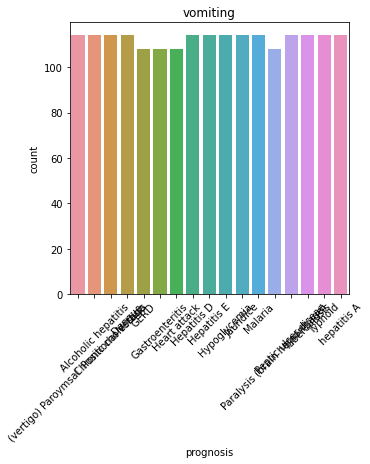

                         burning_micturition  Percent
prognosis                                            
Drug Reaction                            108     50.0
Urinary tract infection                  108     50.0


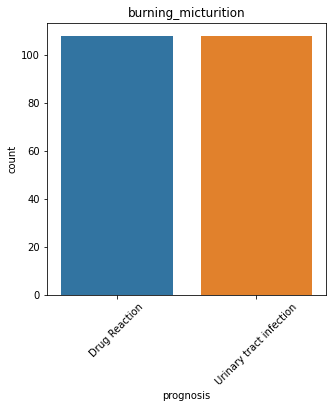

               spotting_ urination  Percent
prognosis                                  
Drug Reaction                  108    100.0


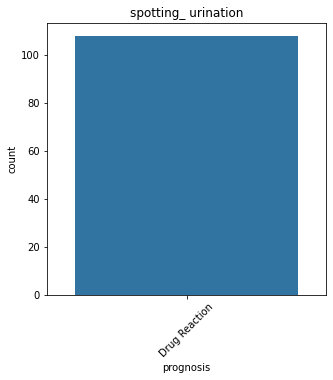

                  fatigue   Percent
prognosis                          
Bronchial Asthma      108  5.590062
Chicken pox           114  5.900621
Common Cold           114  5.900621
Dengue                114  5.900621
Diabetes              114  5.900621
Hepatitis B           114  5.900621
Hepatitis C           114  5.900621
Hepatitis D           114  5.900621
Hepatitis E           114  5.900621
Hyperthyroidism       114  5.900621
Hypoglycemia          114  5.900621
Hypothyroidism        108  5.590062
Jaundice              114  5.900621
Pneumonia             114  5.900621
Tuberculosis          114  5.900621
Typhoid               120  6.211180
Varicose veins        114  5.900621


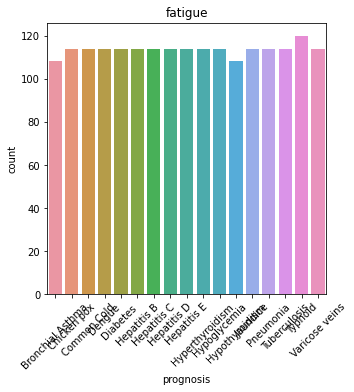

                weight_gain  Percent
prognosis                           
Hypothyroidism          114    100.0


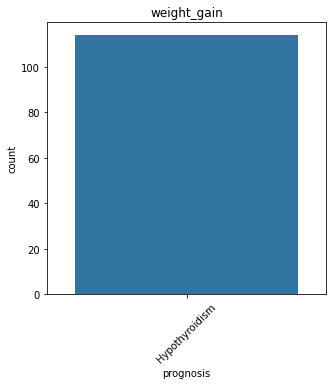

              anxiety  Percent
prognosis                     
Hypoglycemia      114    100.0


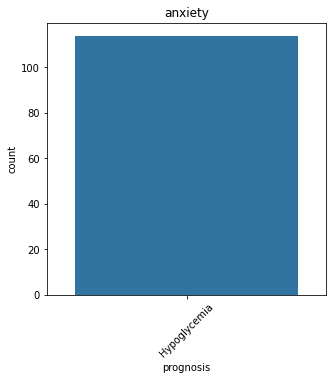

                 mood_swings  Percent
prognosis                            
Hyperthyroidism          114     50.0
Hypothyroidism           114     50.0


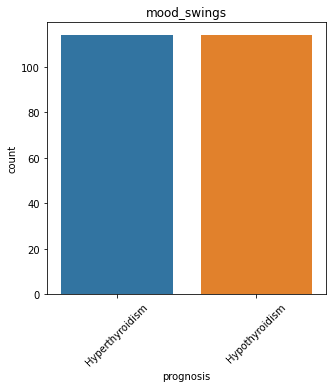

                 weight_loss  Percent
prognosis                            
Diabetes                 114     25.0
Hyperthyroidism          114     25.0
Jaundice                 114     25.0
Tuberculosis             114     25.0


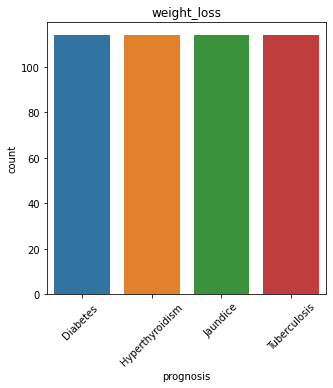

                 restlessness  Percent
prognosis                             
Diabetes                  114     50.0
Hyperthyroidism           114     50.0


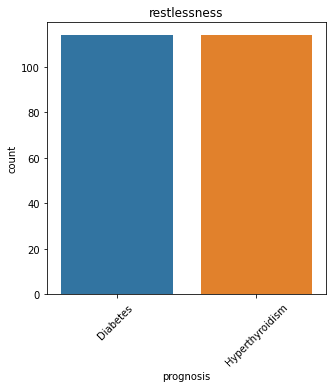

                lethargy  Percent
prognosis                        
Chicken pox          114     25.0
Diabetes             114     25.0
Hepatitis B          114     25.0
Hypothyroidism       114     25.0


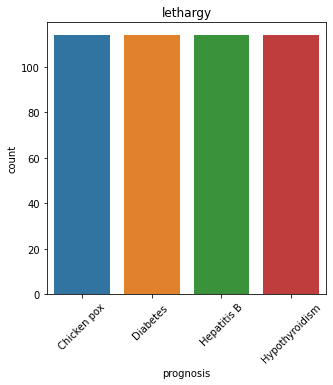

           irregular_sugar_level  Percent
prognosis                                
Diabetes                     114    100.0


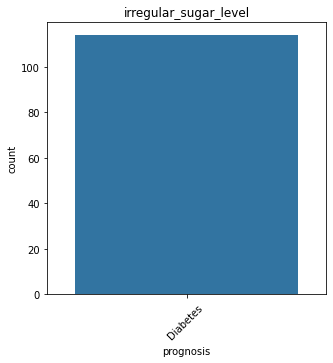

                  cough    Percent
prognosis                         
Bronchial Asthma    108  19.148936
Common Cold         114  20.212766
GERD                114  20.212766
Pneumonia           114  20.212766
Tuberculosis        114  20.212766


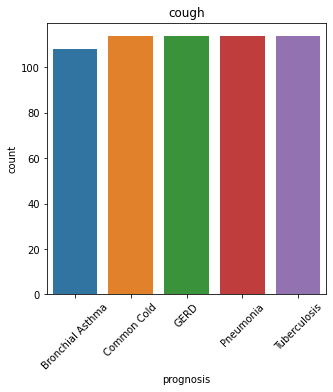

                  high_fever   Percent
prognosis                             
AIDS                     114  8.370044
Bronchial Asthma         114  8.370044
Chicken pox              114  8.370044
Common Cold              114  8.370044
Dengue                   114  8.370044
Hepatitis E              114  8.370044
Impetigo                 102  7.488987
Jaundice                 114  8.370044
Malaria                  114  8.370044
Pneumonia                114  8.370044
Tuberculosis             114  8.370044
Typhoid                  120  8.810573


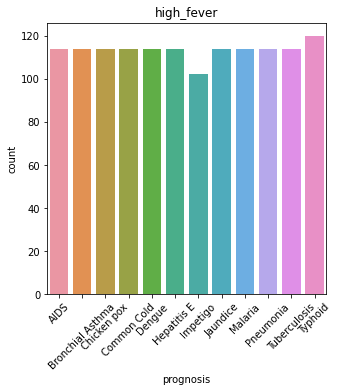

                 sunken_eyes  Percent
prognosis                            
Gastroenteritis          108    100.0


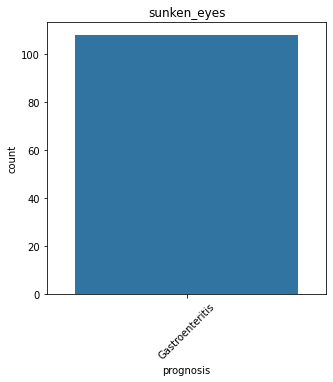

                  breathlessness    Percent
prognosis                                  
Bronchial Asthma             114  25.333333
Heart attack                 108  24.000000
Pneumonia                    114  25.333333
Tuberculosis                 114  25.333333


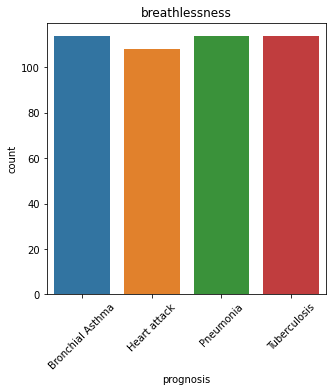

                 sweating    Percent
prognosis                           
Heart attack          108  15.929204
Hyperthyroidism       114  16.814159
Hypoglycemia          114  16.814159
Malaria               114  16.814159
Pneumonia             114  16.814159
Tuberculosis          114  16.814159


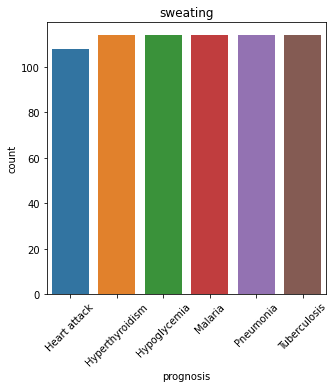

                     indigestion    Percent
prognosis                                  
Migraine                     114  51.351351
Peptic ulcer diseae          108  48.648649


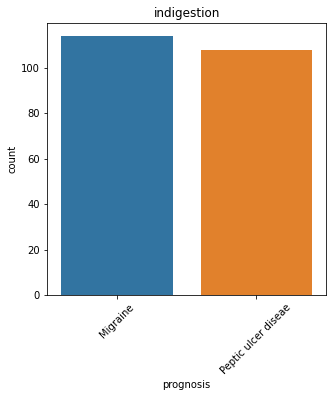

                                         headache    Percent
prognosis                                                   
(vertigo) Paroymsal  Positional Vertigo       114  10.052910
Chicken pox                                   114  10.052910
Common Cold                                   114  10.052910
Dengue                                        120  10.582011
Hypertension                                  108   9.523810
Hypoglycemia                                  114  10.052910
Malaria                                       114  10.052910
Migraine                                      114  10.052910
Paralysis (brain hemorrhage)                  108   9.523810
Typhoid                                       114  10.052910


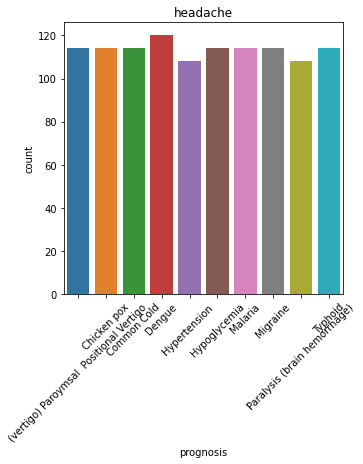

                     yellowish_skin  Percent
prognosis                                   
Alcoholic hepatitis             114     12.5
Chronic cholestasis             114     12.5
Hepatitis B                     114     12.5
Hepatitis C                     114     12.5
Hepatitis D                     114     12.5
Hepatitis E                     114     12.5
Jaundice                        114     12.5
hepatitis A                     114     12.5


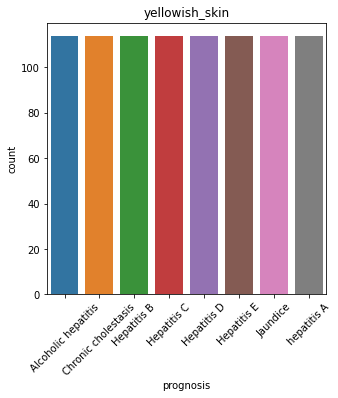

             dark_urine  Percent
prognosis                       
Hepatitis B         114     20.0
Hepatitis D         114     20.0
Hepatitis E         114     20.0
Jaundice            114     20.0
hepatitis A         114     20.0


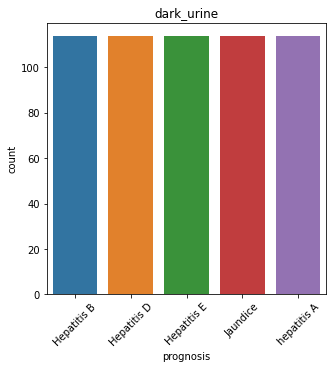

                                         nausea    Percent
prognosis                                                 
(vertigo) Paroymsal  Positional Vertigo     114   9.947644
Chronic cholestasis                         114   9.947644
Dengue                                      120  10.471204
Hepatitis C                                 114   9.947644
Hepatitis D                                 114   9.947644
Hepatitis E                                 114   9.947644
Hypoglycemia                                114   9.947644
Malaria                                     114   9.947644
Typhoid                                     114   9.947644
hepatitis A                                 114   9.947644


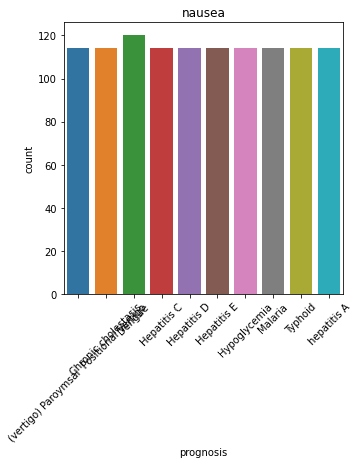

                     loss_of_appetite    Percent
prognosis                                       
Chicken pox                       114   9.895833
Chronic cholestasis               114   9.895833
Dengue                            120  10.416667
Hepatitis B                       114   9.895833
Hepatitis C                       114   9.895833
Hepatitis D                       114   9.895833
Hepatitis E                       120  10.416667
Peptic ulcer diseae               108   9.375000
Tuberculosis                      120  10.416667
hepatitis A                       114   9.895833


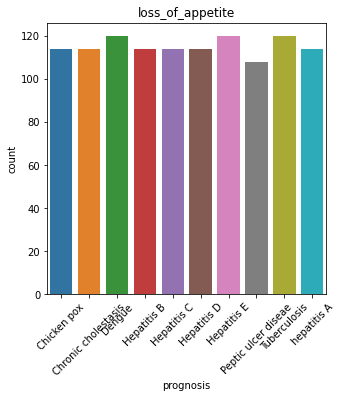

           pain_behind_the_eyes  Percent
prognosis                               
Dengue                      120    100.0


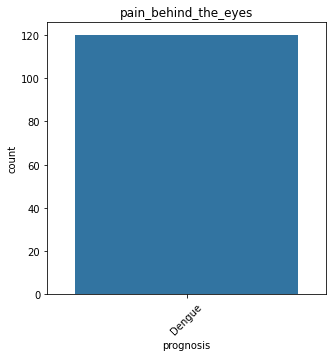

                      back_pain    Percent
prognosis                                 
Cervical spondylosis        108  47.368421
Dengue                      120  52.631579


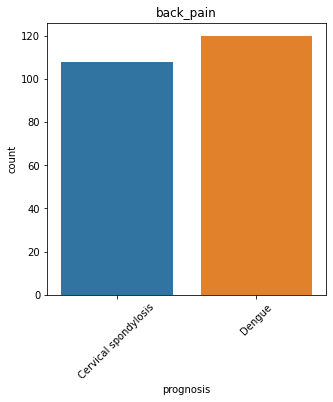

                              constipation  Percent
prognosis                                          
Dimorphic hemmorhoids(piles)           114     50.0
Typhoid                                114     50.0


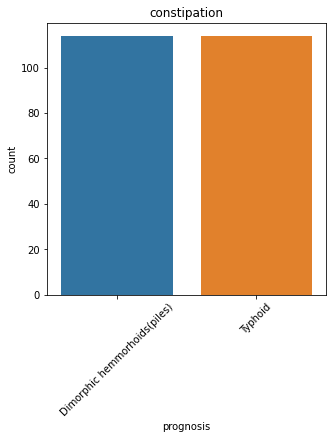

                     abdominal_pain    Percent
prognosis                                     
Alcoholic hepatitis             114  11.046512
Chronic cholestasis             114  11.046512
Hepatitis B                     114  11.046512
Hepatitis D                     114  11.046512
Hepatitis E                     120  11.627907
Jaundice                        114  11.046512
Peptic ulcer diseae             114  11.046512
Typhoid                         114  11.046512
hepatitis A                     114  11.046512


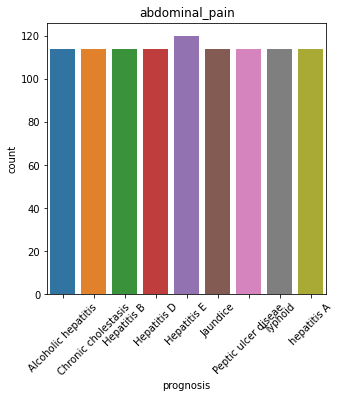

                 diarrhoea    Percent
prognosis                            
Gastroenteritis        114  20.212766
Hyperthyroidism        114  20.212766
Malaria                108  19.148936
Typhoid                114  20.212766
hepatitis A            114  20.212766


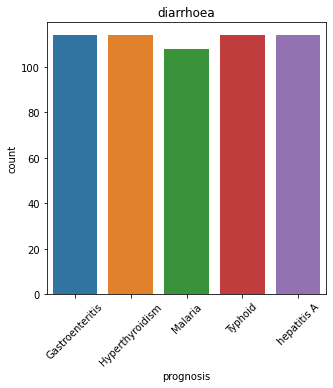

              mild_fever    Percent
prognosis                          
Chicken pox          114  32.203390
Tuberculosis         120  33.898305
hepatitis A          120  33.898305


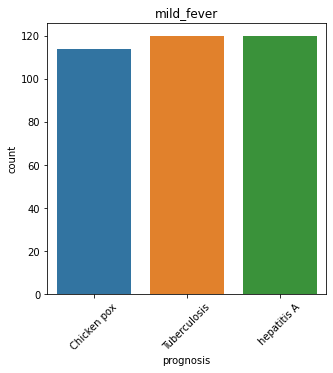

             yellow_urine  Percent
prognosis                         
Hepatitis B           114    100.0


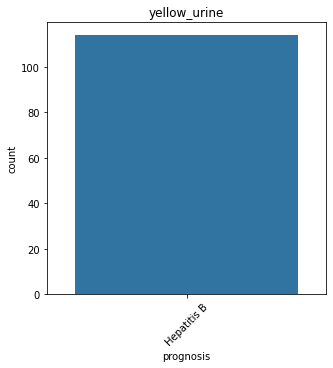

                     yellowing_of_eyes    Percent
prognosis                                        
Chronic cholestasis                114  13.970588
Hepatitis B                        120  14.705882
Hepatitis C                        108  13.235294
Hepatitis D                        114  13.970588
Hepatitis E                        120  14.705882
Tuberculosis                       120  14.705882
hepatitis A                        120  14.705882


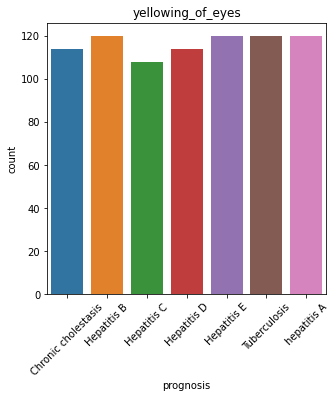

             acute_liver_failure  Percent
prognosis                                
Hepatitis E                  114    100.0


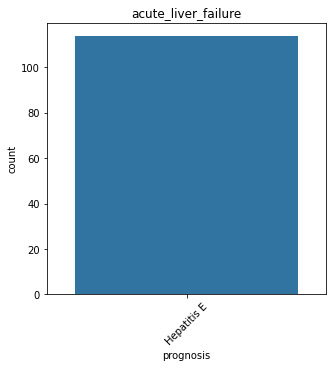

Empty DataFrame
Columns: [fluid_overload, Percent]
Index: []


ValueError: ignored

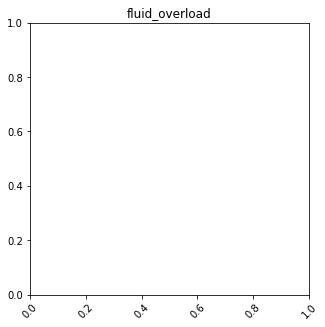

In [58]:
df = train_data
for i in x.columns:
 if i == "spotting_ urination":
     smptm = df.loc[df['spotting_ urination']==1].groupby('prognosis')['spotting_ urination'].sum()
 else:
     exec("smptm = df.loc[df."+i+"==1].groupby('prognosis')."+i+".sum()")
 smptm = pd.DataFrame(smptm)
 smptm['Percent'] = (smptm[i]/smptm[i].sum())*100
 print(smptm)
 plt.figure(figsize=(5,5))
 plt.xticks(rotation=45)
 plt.title(i)
 sns.barplot(x=smptm.index,y=smptm[i])
 plt.ylabel("count")
 plt.show()

In [55]:
#train_data.hist()

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_test.shape

(984, 81)

## Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
scores = []
for i in range(1,50):
 dtc = DecisionTreeClassifier(max_depth=i).fit(x,y)
 y_pred_dtc = dtc.predict(x_test)
 scores.append(dtc.score(x_test,y_test))

In [ ]:
y_pred_dtc

In [ ]:
fine_depth = scores.index(max(scores))
scores[fine_depth]

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test,y_pred_dtc)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### Recall Score for each class

In [ ]:
from sklearn.metrics import recall_score
prec = recall_score(y_test,y_pred_dtc,average=None)
print("sensitivity for each class: ",prec)

## Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x,y)
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

In [ ]:
# Accuracy score
print("Training set accuracy: ",rfc.score(x,y))
print("Test set accuracy: ",rfc.score(x_test,y_test))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test,y_pred_rfc)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### Recall Score for each class

In [ ]:
from sklearn.metrics import recall_score
prec = recall_score(y_test,y_pred_rfc,average=None)
print("sensitivity for each class: ",prec)

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB().fit(x,y)
y_pred_nbc = nbc.predict(x_test)
y_pred_nbc

In [ ]:
#Accuracy Score
print("Training set accuracy: ",nbc.score(x,y))
print("Test set accuracy: ",nbc.score(x_test,y_test))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test,y_pred_nbc)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### Recall Score for each class

In [ ]:
from sklearn.metrics import recall_score
prec = recall_score(y_test,y_pred_nbc,average=None)
print("sensitivity for each class: ",prec)

## MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-5, max_iter=500, hidden_layer_sizes=(15, 7), random_state=10)
mlp.fit(x,y)
y_pred_mlp = mlp.predict(x_test)
y_pred_mlp

In [ ]:
#Accuracy Score
print("Training set accuracy: ",nbc.score(x,y))
print("Test set accuracy: ",mlp.score(x_test,y_test))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test,y_pred_mlp)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()